In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer 
from itertools import combinations
from itertools import product
from scipy.stats import chi2_contingency

In [88]:
data = pd.read_csv("HR_Analytics.csv")
data

,staff_id,division,area_code,qualifications,gender_id,source,training_sessions,years_old,last_year_rating,tenure,recognition_awards,mean_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


In [89]:
# We will check for duplicates 
data.duplicated().sum()

0

In [90]:
# We'll remove the duplicates 
data.drop_duplicates(inplace=True) # inplace=True modifies the existing dataframe directly modifies the original dataframe

In [91]:
# We will check for null/nan/missing values in the data 
data.isnull().sum()

staff_id                  0
division                  0
area_code                 0
qualifications         1034
gender_id                 0
source                    0
training_sessions         0
years_old                 0
last_year_rating       1812
tenure                    0
recognition_awards        0
mean_training_score       0
dtype: int64

In [92]:
data.shape

(23490, 12)

In [93]:
data.nunique()

staff_id               23490
division                   9
area_code                 34
qualifications             3
gender_id                  2
source                     3
training_sessions          9
years_old                 41
last_year_rating           5
tenure                    34
recognition_awards         2
mean_training_score       61
dtype: int64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   staff_id             23490 non-null  int64  
 1   division             23490 non-null  object 
 2   area_code            23490 non-null  object 
 3   qualifications       22456 non-null  object 
 4   gender_id            23490 non-null  object 
 5   source               23490 non-null  object 
 6   training_sessions    23490 non-null  int64  
 7   years_old            23490 non-null  int64  
 8   last_year_rating     21678 non-null  float64
 9   tenure               23490 non-null  int64  
 10  recognition_awards   23490 non-null  int64  
 11  mean_training_score  23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [95]:
data.describe()# Display the summary statistics for the numerical columns in the dataset

,staff_id,training_sessions,years_old,last_year_rating,tenure,recognition_awards,mean_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


# Univariate Analysis: Examining Individual Features

In [96]:
data.columns

Index(['staff_id', 'division', 'area_code', 'qualifications', 'gender_id',
       'source', 'training_sessions', 'years_old', 'last_year_rating',
       'tenure', 'recognition_awards', 'mean_training_score'],
      dtype='object')

In [97]:
num_cols = [col for col in data.columns if data[col].dtypes=="int64" or  data[col].dtypes=="float64"]
num_cols

['staff_id',
 'training_sessions',
 'years_old',
 'last_year_rating',
 'tenure',
 'recognition_awards',
 'mean_training_score']

## **Analysis of Numerical Columns

# training_sessions

In [98]:
data["training_sessions"].value_counts()

training_sessions
1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
8        2
9        2
Name: count, dtype: int64

<Axes: xlabel='training_sessions', ylabel='Count'>

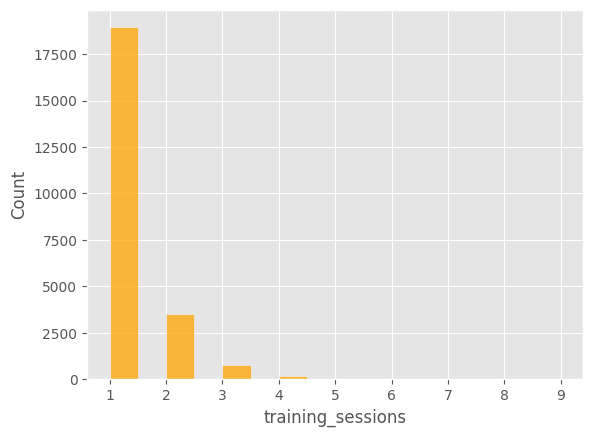

In [99]:
sns.histplot(data=data, x="training_sessions", color="orange")
# Despite being numeric, this column has only 9 unique values, so we can treat it as a categorical feature


The discrete bars are visible because the training_sessions column contains only 9 unique values.

Inference: The majority of employees have participated in just 1 or 2 training sessions, with a maximum of 9 sessions.

# AGE

<Axes: xlabel='years_old', ylabel='Count'>

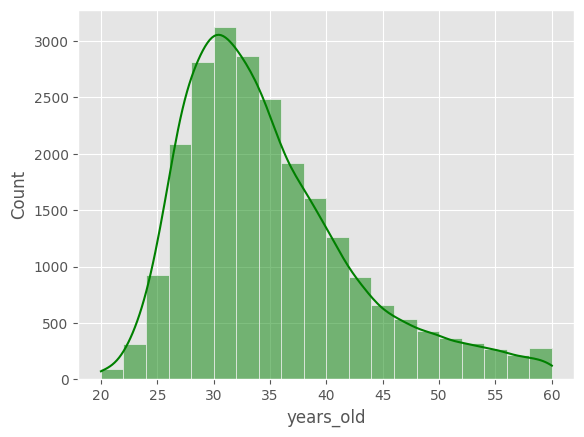

In [100]:
sns.histplot(data=data, x="years_old", bins=20, color="green", kde=True)


The majority of employees are young, with only a few being older. There is a noticeable peak around 30 years old, which is typical in many companies that tend to hire younger employees with limited work experience.

# tenure

<Axes: xlabel='tenure', ylabel='Count'>

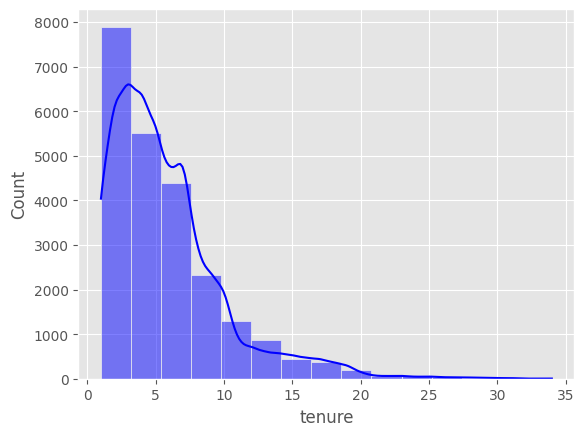

In [101]:
sns.histplot(data=data, x="tenure", bins=15, color="blue", kde=True)

We can see that most employees have a relatively short tenure with their previous employer, as the KDE is highly right-skewed.

## AWARDS WON

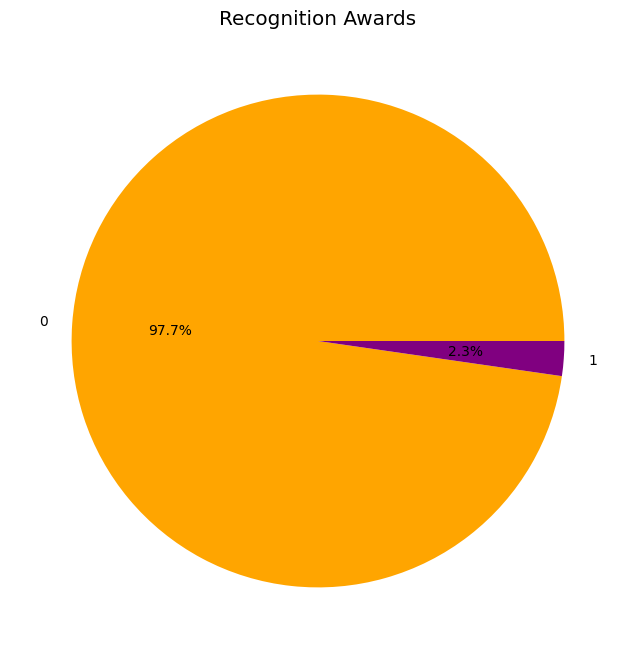

In [102]:
counts = data["recognition_awards"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["orange", "purple"])  # Changed colors to orange and purple
plt.title('Recognition Awards')
plt.show()


Only 2.3% of employees have received the award, which is logical since awards are typically given by the company to a select few outstanding employees for their excellent performance.

## mean_training_score

<Axes: xlabel='mean_training_score', ylabel='Count'>

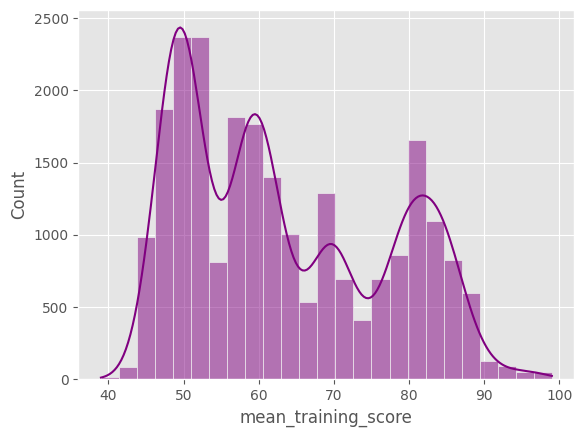

In [103]:
sns.histplot(data=data, x="mean_training_score", bins=25, kde=True, color="purple")

There is a wide variation in the mean training scores. Fewer employees have scored above 80.

# last_year_rating

C:\Users\Deepak\AppData\Local\Temp\ipykernel_10892\4024520353.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="last_year_rating", palette="Set1")


<Axes: xlabel='last_year_rating', ylabel='count'>

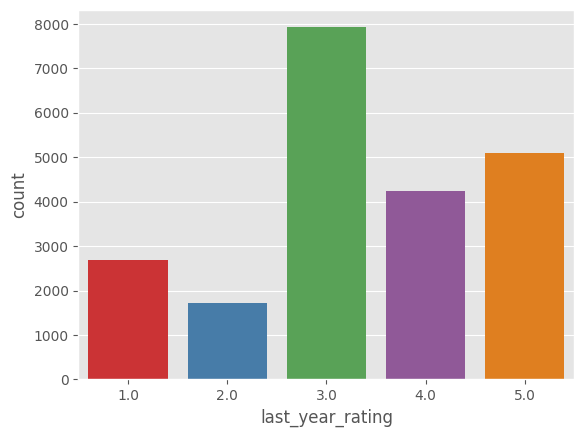

In [104]:
sns.countplot(data=data, x="last_year_rating", palette="Set1")

## **Analysis of Categorical Columns

In [105]:
cat_cols = [col for col in data.columns if data[col].dtypes=="object"]
cat_cols

['division', 'area_code', 'qualifications', 'gender_id', 'source']

# Department

In [106]:
data.division.value_counts()

division
Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: count, dtype: int64

C:\Users\Deepak\AppData\Local\Temp\ipykernel_10892\2596237233.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y="division", palette="Pastel1")


<Axes: xlabel='count', ylabel='division'>

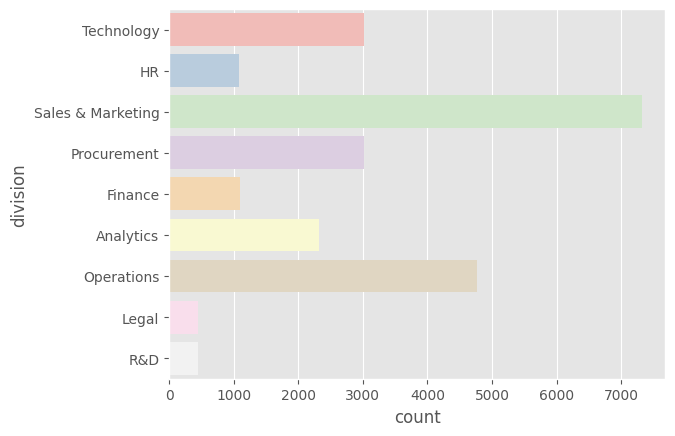

In [107]:
sns.countplot(data=data, y="division", palette="Pastel1")

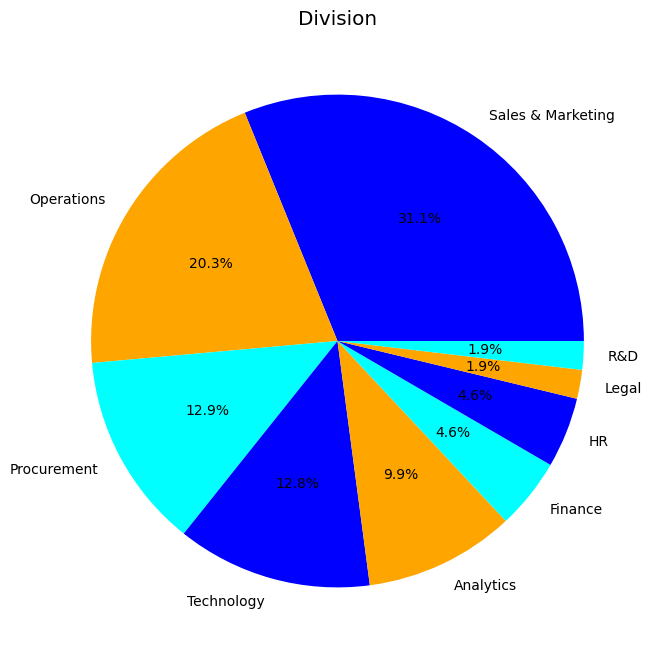

In [108]:
counts = data["division"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["blue", "orange", "cyan"])
plt.title('Division')
plt.show()


Operations and Sales&Marketing covers half of company employees with very few in R&D, Legal, Finance etc

# Education

<Axes: xlabel='qualifications', ylabel='count'>

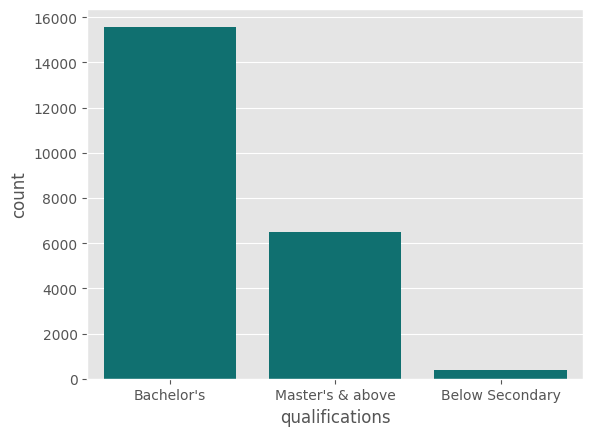

In [109]:
sns.countplot(data=data, x="qualifications", color="teal")

Max employees are decently educated, few being highly educated, very less being less educated

# Gender

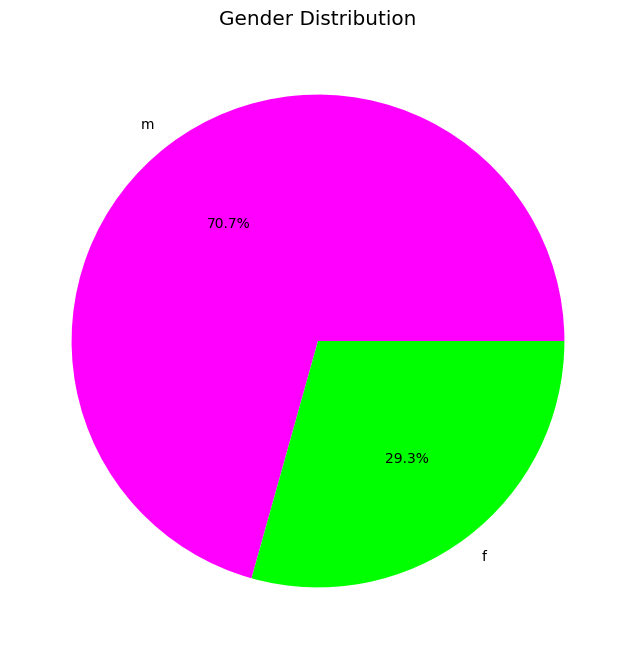

In [110]:
counts = data["gender_id"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["magenta", "lime"])
plt.title('Gender Distribution')
plt.show()


More than 70% employees in the company are male

# source

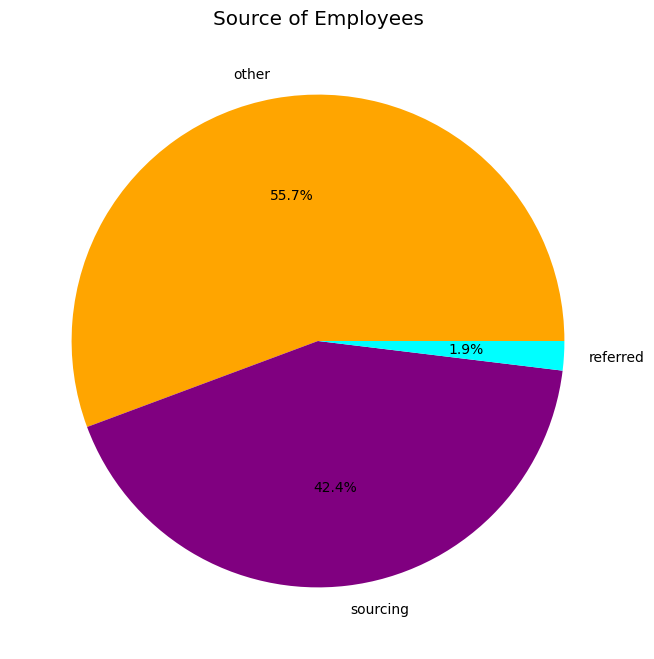

In [111]:
counts = data["source"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["orange", "purple", "cyan"])
plt.title('Source of Employees')
plt.show()

# Region

<Axes: xlabel='count', ylabel='area_code'>

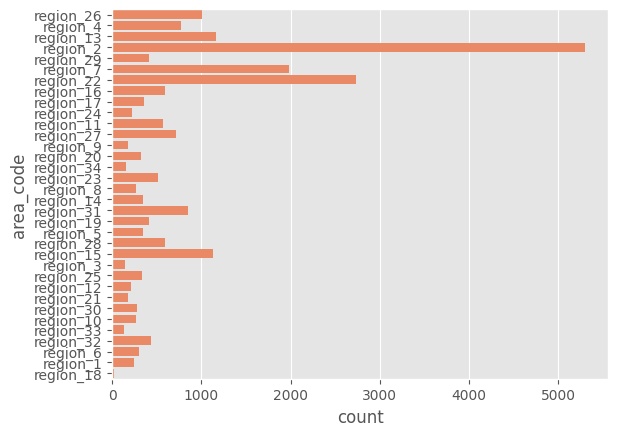

In [112]:
sns.countplot(data=data, y="area_code", color="coral")

Max employees belong to area_code2, while remaining approx evenly spread in rest locations

## Individual Column Analysis Complete: Filling Null Values in the Dataset

Based on the analysis of last_year_rating, i think its better to fill nan values using meadian

In [113]:
si1 = SimpleImputer(strategy="median")
imputed_values = si1.fit_transform(data[["last_year_rating"]])
data["last_year_rating"] = imputed_values  # Assign the imputed values back to the original DataFrame


For the qualifications column lets use the mode (graduate) as its categorical data mean, meadin doesnt make sense and also graduate class is largely dominant over the other two

In [114]:
# Let's use fillna this time
mode = data['qualifications'].mode()[0]
data['qualifications'] = data['qualifications'].fillna(mode)  # Fill missing values with the mode


In [115]:
data.isnull().sum()

staff_id               0
division               0
area_code              0
qualifications         0
gender_id              0
source                 0
training_sessions      0
years_old              0
last_year_rating       0
tenure                 0
recognition_awards     0
mean_training_score    0
dtype: int64

# We have now completed the missing value imputation process.

# Bivariate Analysis: Exploring Relationships Between Two Variables

# 1) Numerical and Numerical

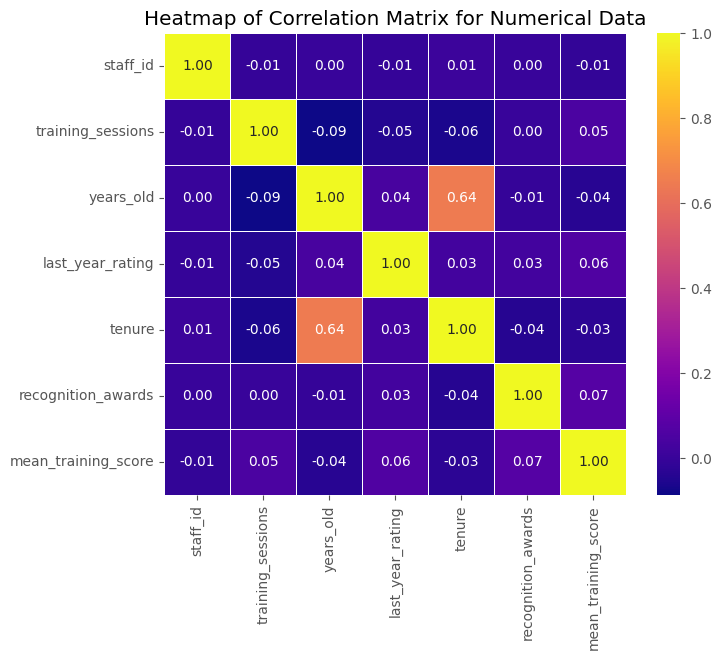

In [116]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='plasma', square=True, cbar=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Data')
plt.show()


From the heatmap of correlation matrix it is evident that that ther isnt much linear relationship between the maximum numerical columns

Two inferences can be drawn:

1. The length of service is well correlated with age, which is logical, as a person who is younger is not expected to have extensive experience.
2. A KPI score above 80 shows a slight relationship with the previous year’s rating.

## 2) Categorical vs. Categorical Analysis

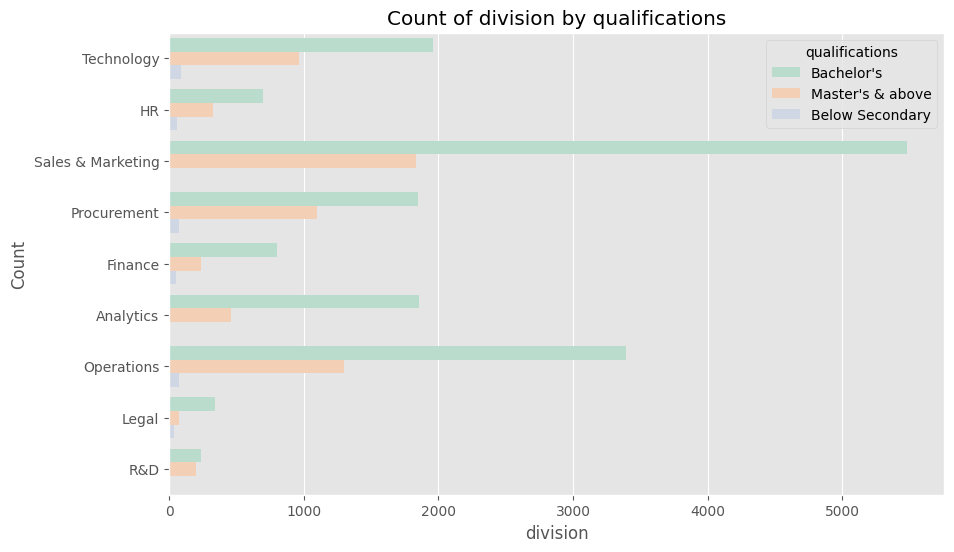

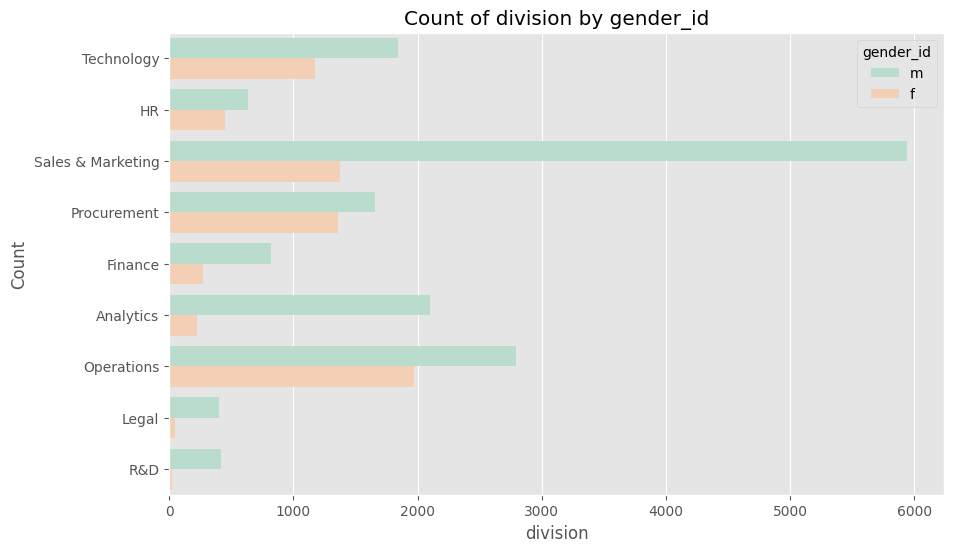

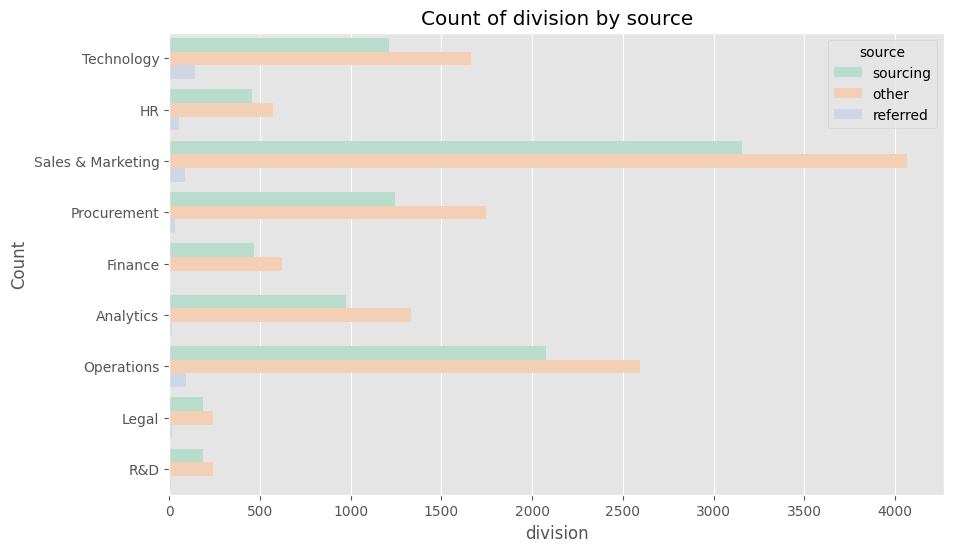

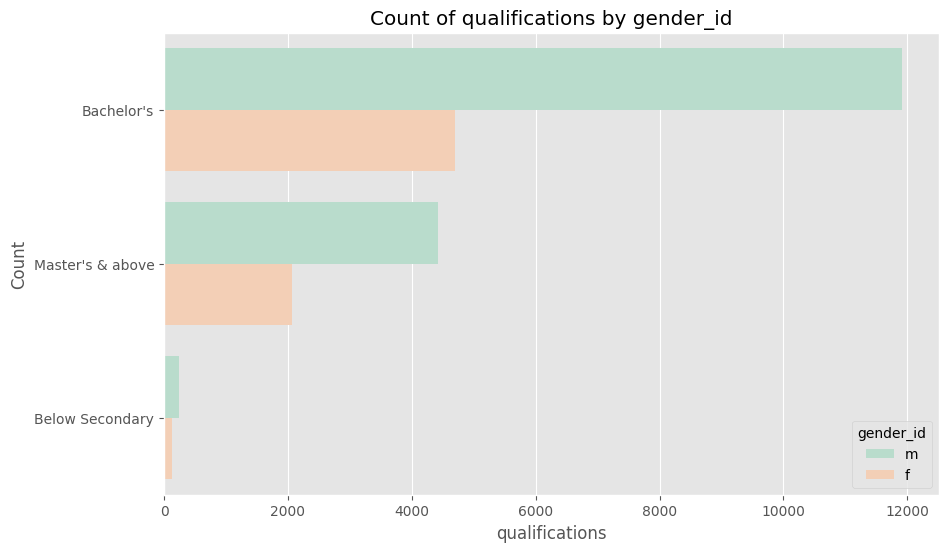

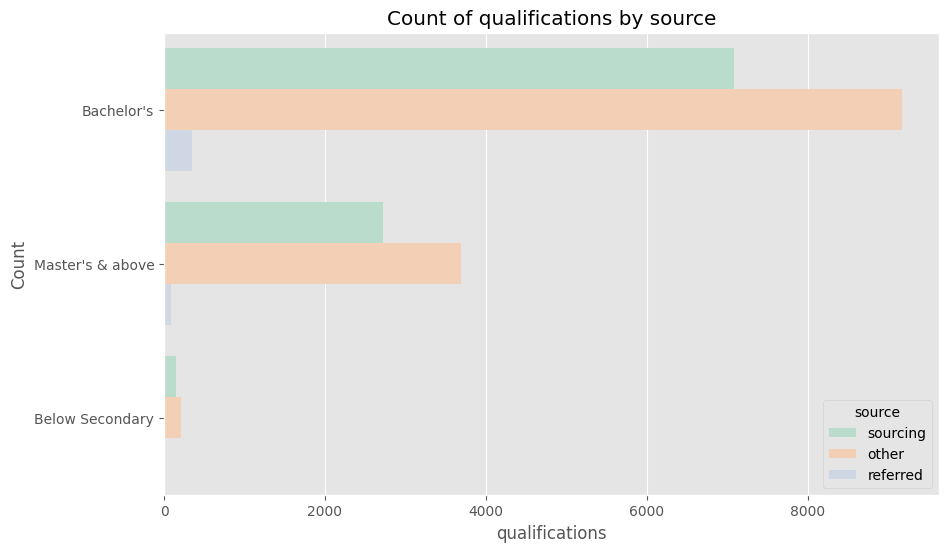

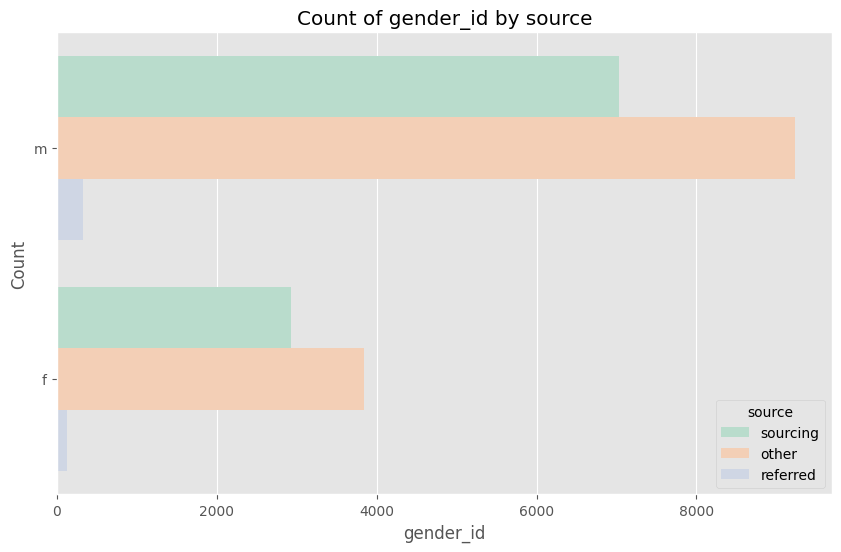

In [117]:
# Let's not plot for area_code as it produces uninformative graphs
cat_col = cat_cols.copy()
cat_col.remove("area_code")
for col1, col2 in combinations(cat_col, 2):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, y=col1, hue=col2, palette='Pastel2')
    plt.title(f'Count of {col1} by {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.legend(title=col2)
    plt.show()


We have plotted count plots for various combinations of categorical columns

In [118]:
for col1, col2 in combinations(cat_cols, 2):
    # Create contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi2 Statistic: {chi2:.4f}, p-value: {p:.4f}, Degrees of Freedom: {dof}")


Chi-Square Test between division and area_code:
Chi2 Statistic: 3911.1396, p-value: 0.0000, Degrees of Freedom: 264
Chi-Square Test between division and qualifications:
Chi2 Statistic: 856.1031, p-value: 0.0000, Degrees of Freedom: 16
Chi-Square Test between division and gender_id:
Chi2 Statistic: 1938.4091, p-value: 0.0000, Degrees of Freedom: 8
Chi-Square Test between division and source:
Chi2 Statistic: 263.0686, p-value: 0.0000, Degrees of Freedom: 16
Chi-Square Test between area_code and qualifications:
Chi2 Statistic: 1686.0120, p-value: 0.0000, Degrees of Freedom: 66
Chi-Square Test between area_code and gender_id:
Chi2 Statistic: 585.3776, p-value: 0.0000, Degrees of Freedom: 33
Chi-Square Test between area_code and source:
Chi2 Statistic: 555.0149, p-value: 0.0000, Degrees of Freedom: 66
Chi-Square Test between qualifications and gender_id:
Chi2 Statistic: 32.8303, p-value: 0.0000, Degrees of Freedom: 2
Chi-Square Test between qualifications and source:
Chi2 Statistic: 23.2596

high p-value implies there is no association between the two categorical data¶

From the results above, we can conclude the following:

1. **Division Relationships**: There is a relationship between division and area_code, qualifications, gender_id, and source, indicating that division is dependent on these factors.
2. **Area Code Dependence**: Area_code is dependent on other categorical factors, including qualifications, gender_id, division, and source.
3. **Independent Pair**: The only independent pair observed is between gender_id and recruitment channel.

## 3) Numerical and Categorical

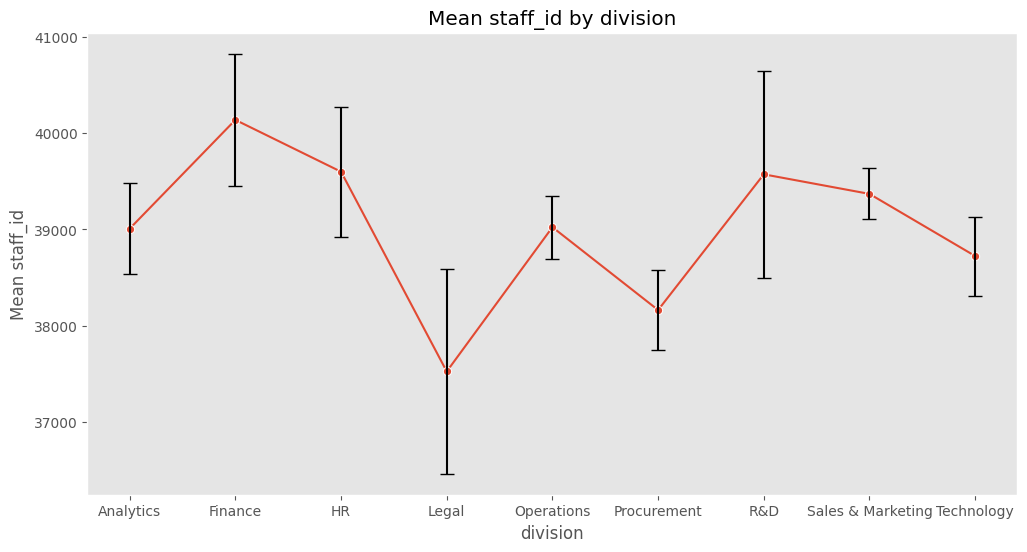

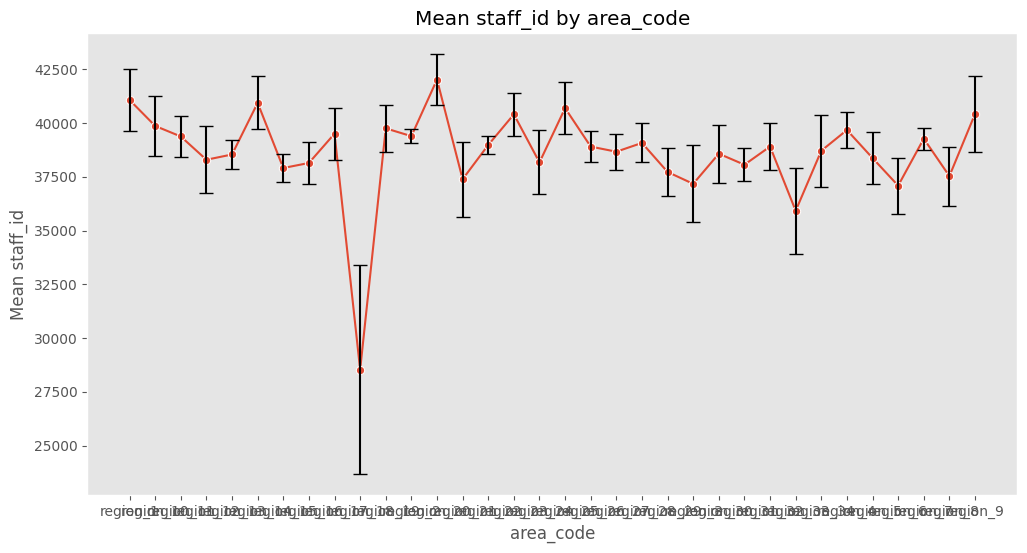

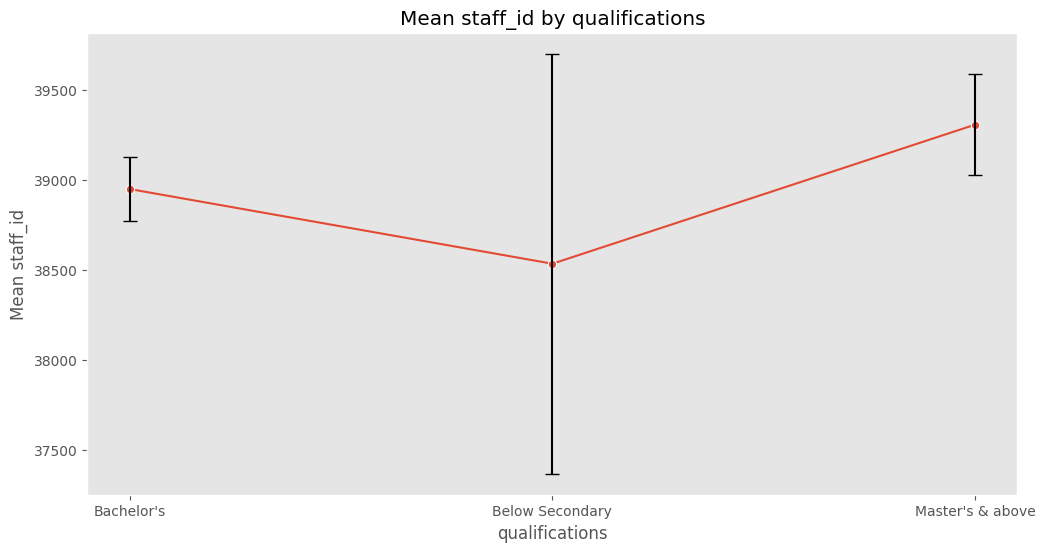

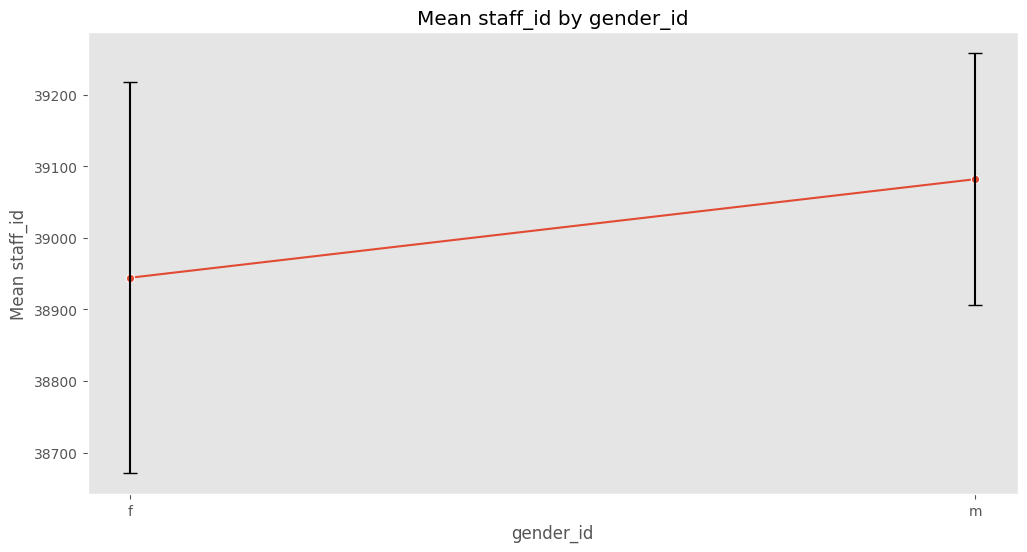

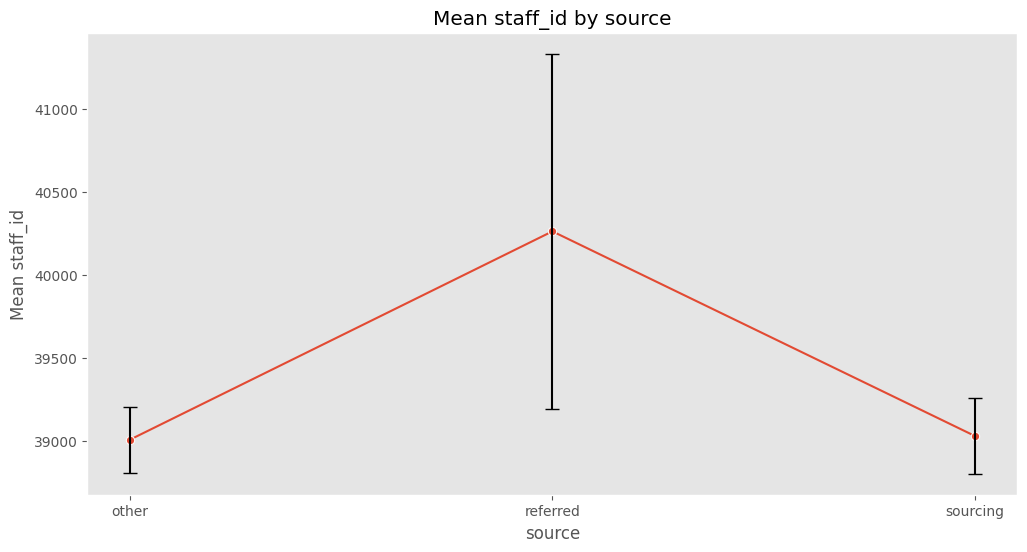

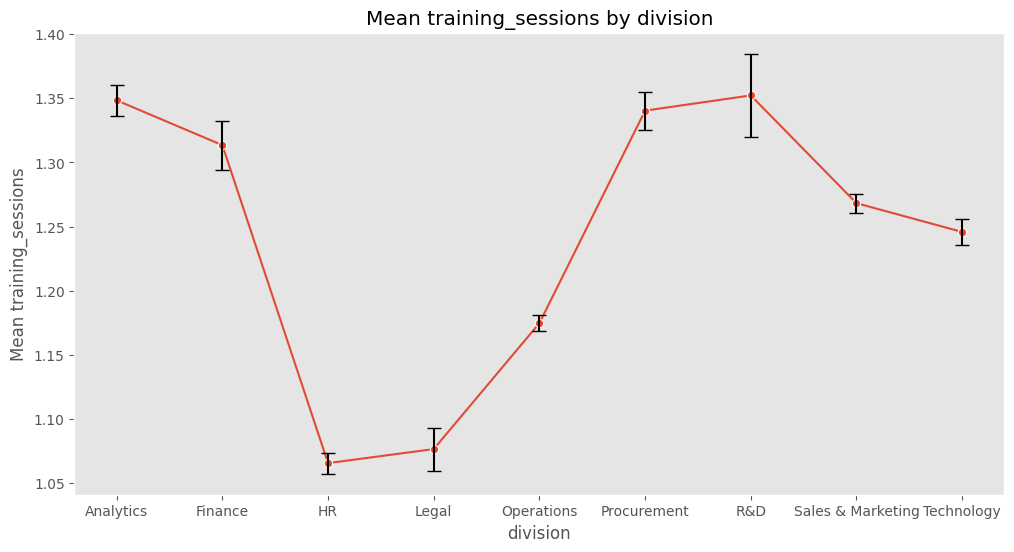

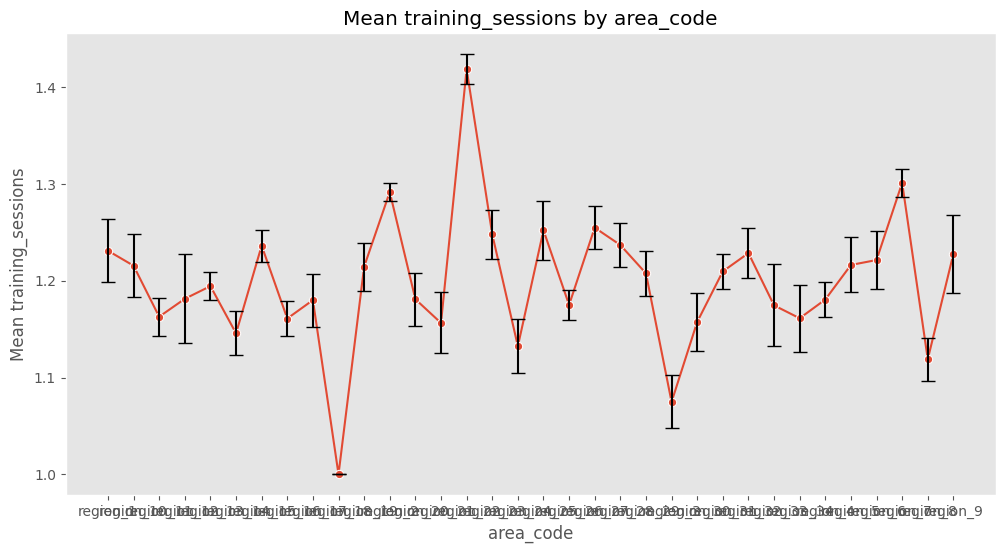

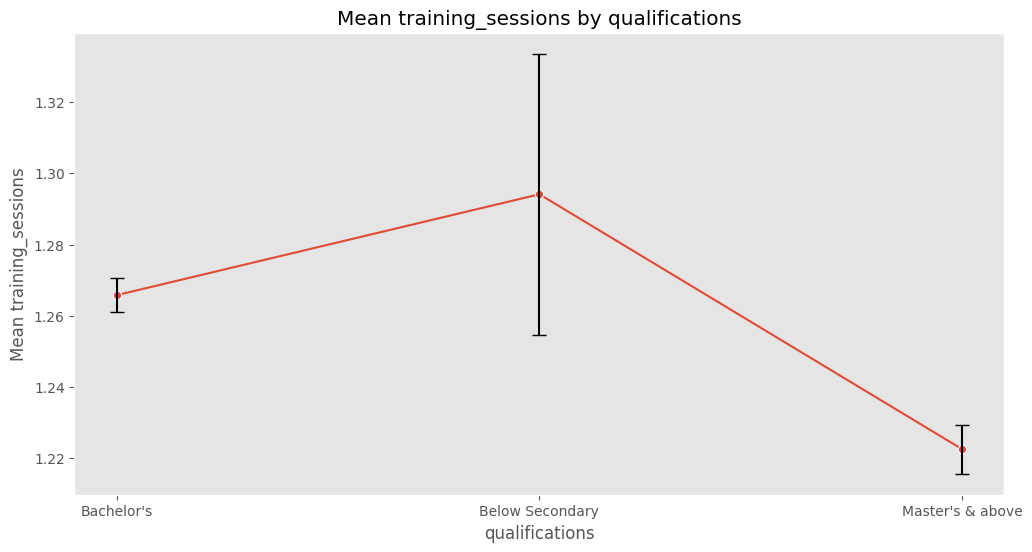

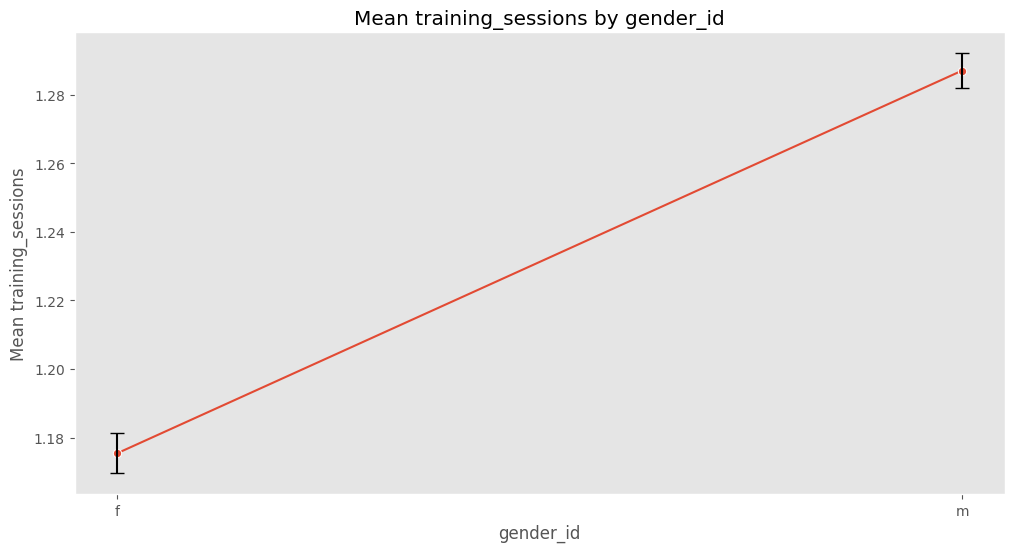

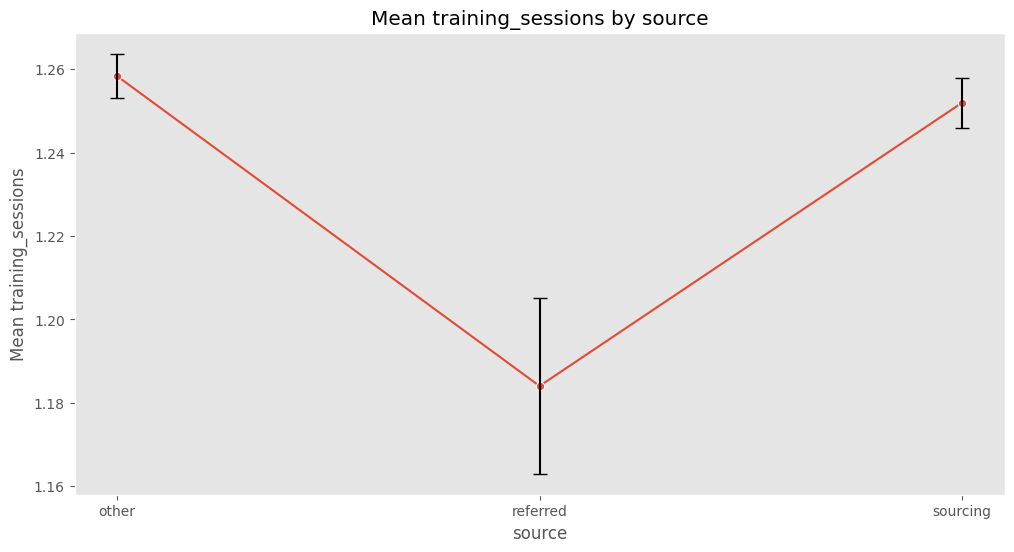

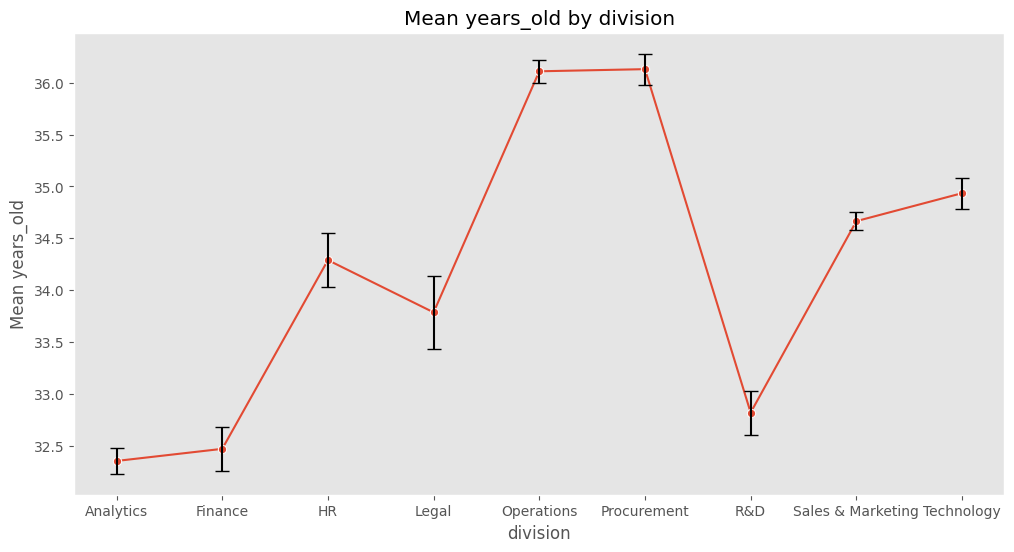

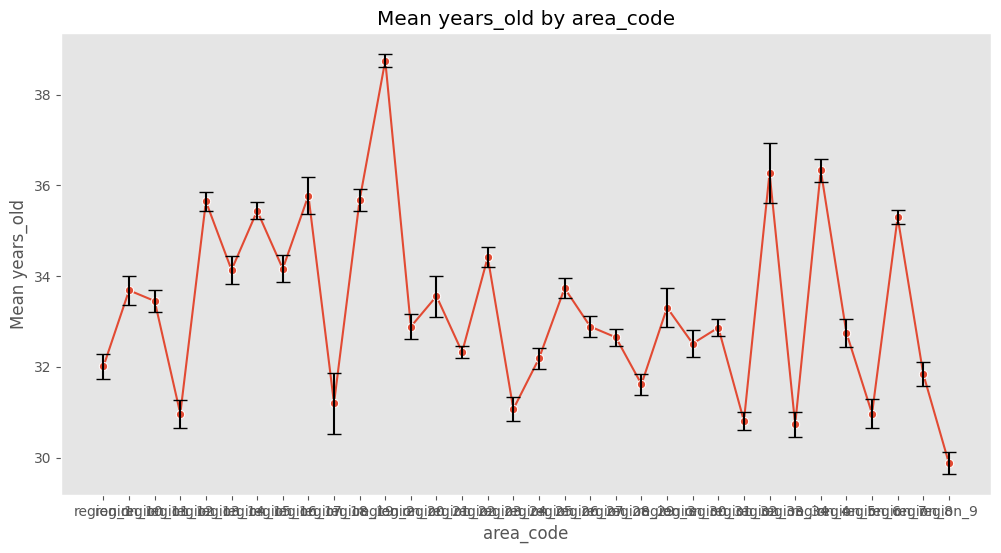

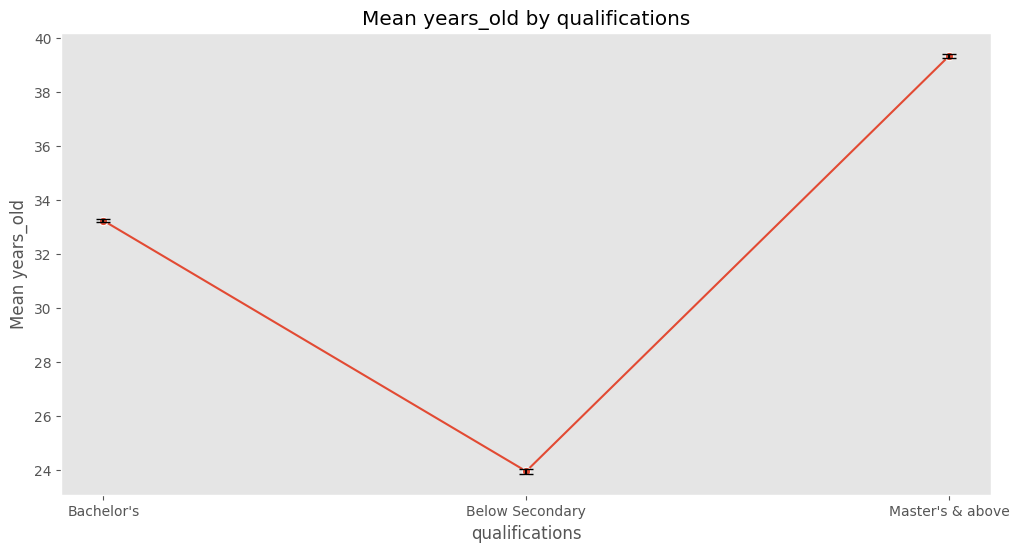

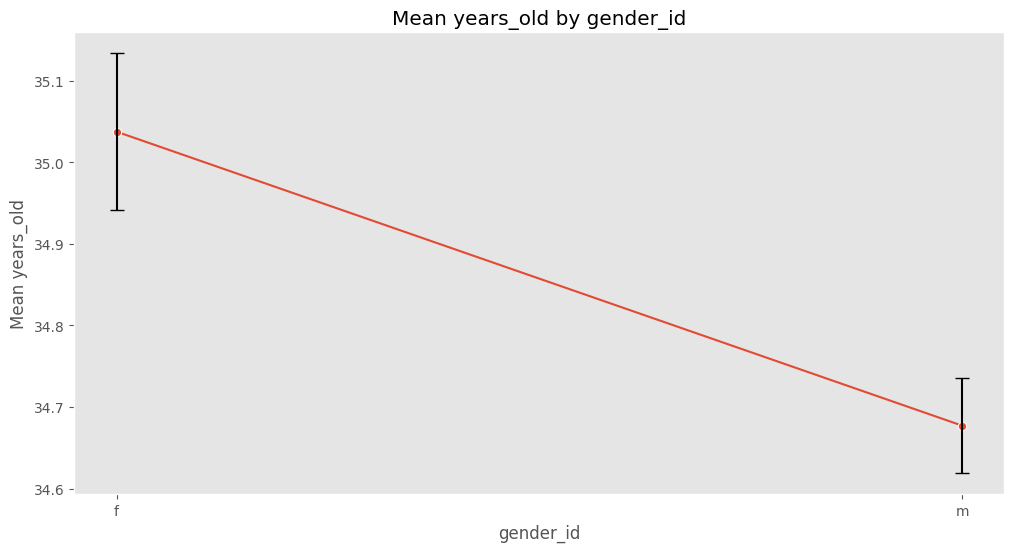

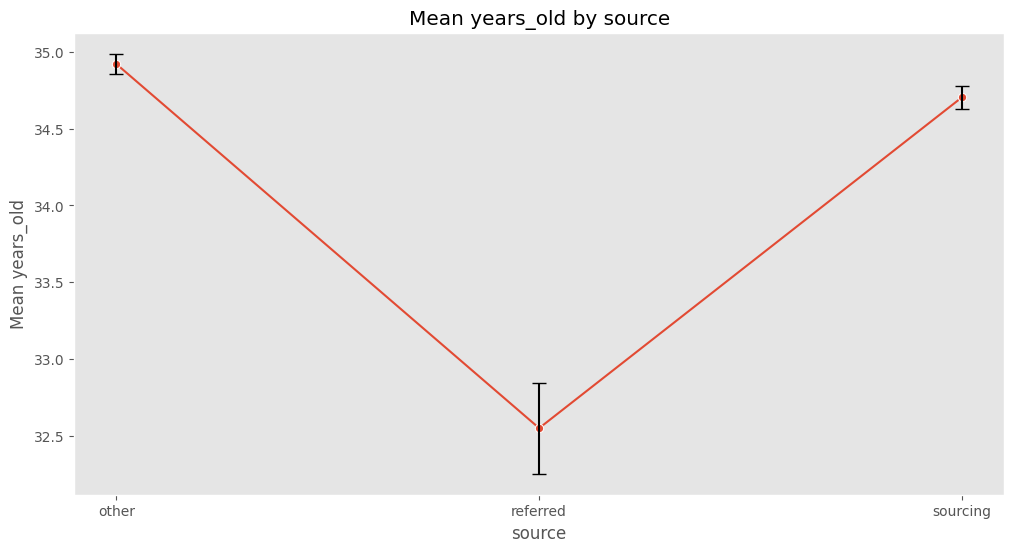

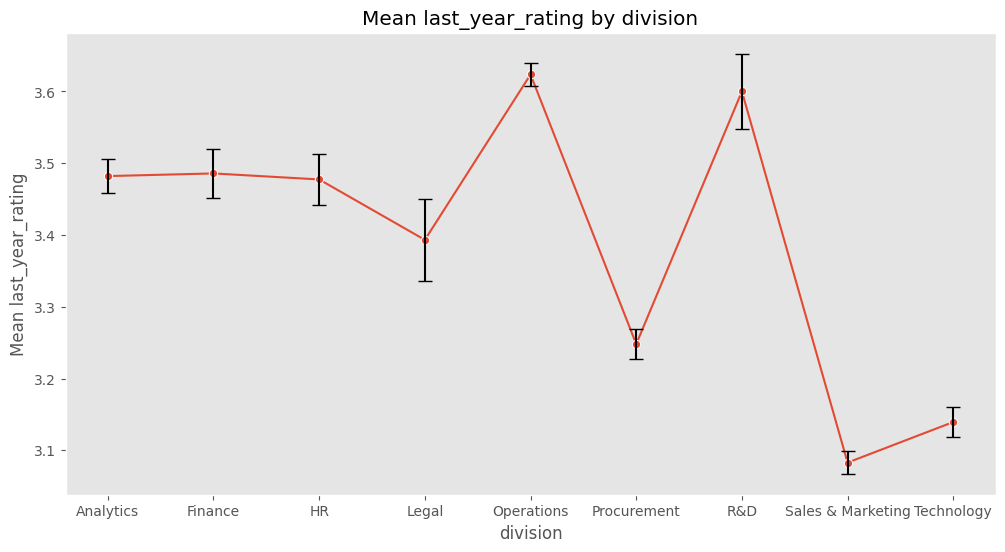

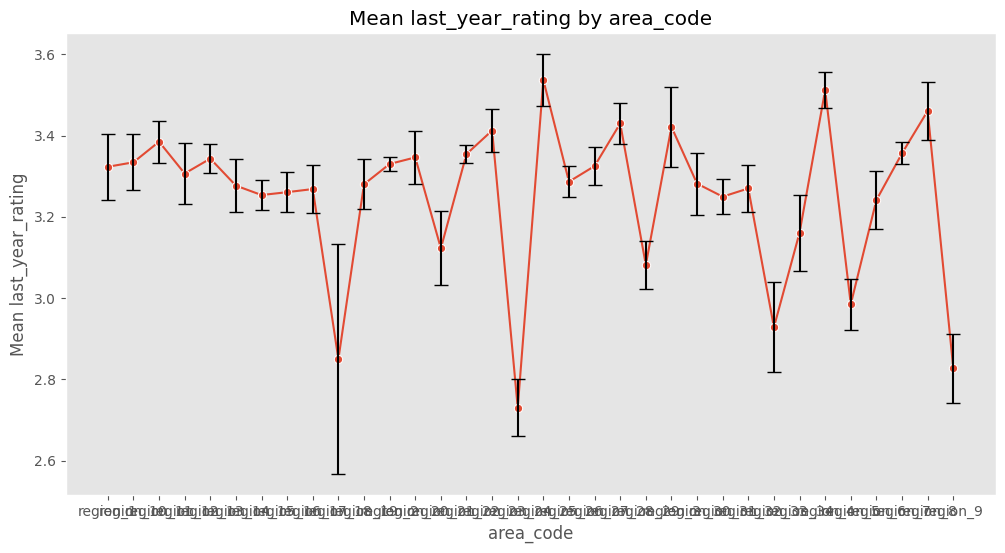

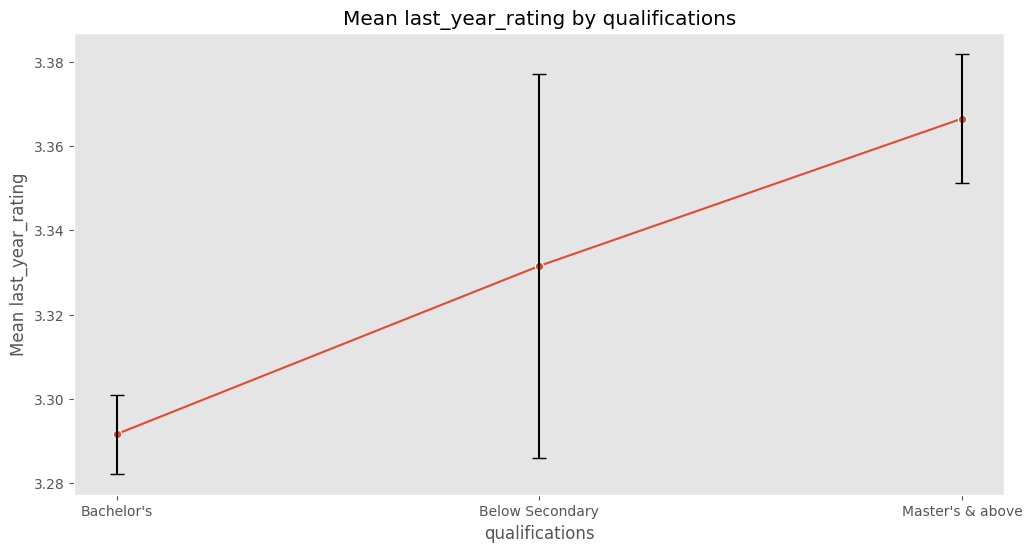

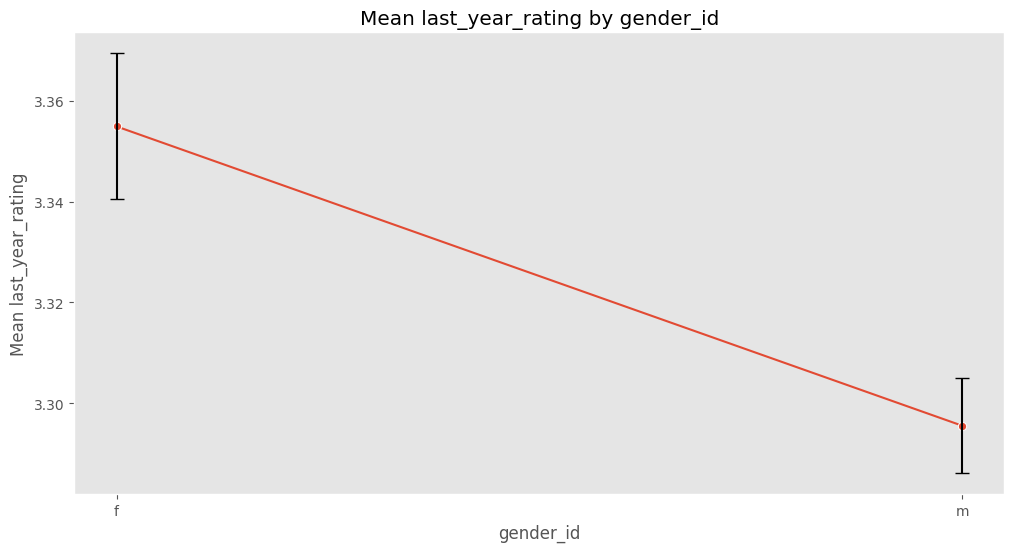

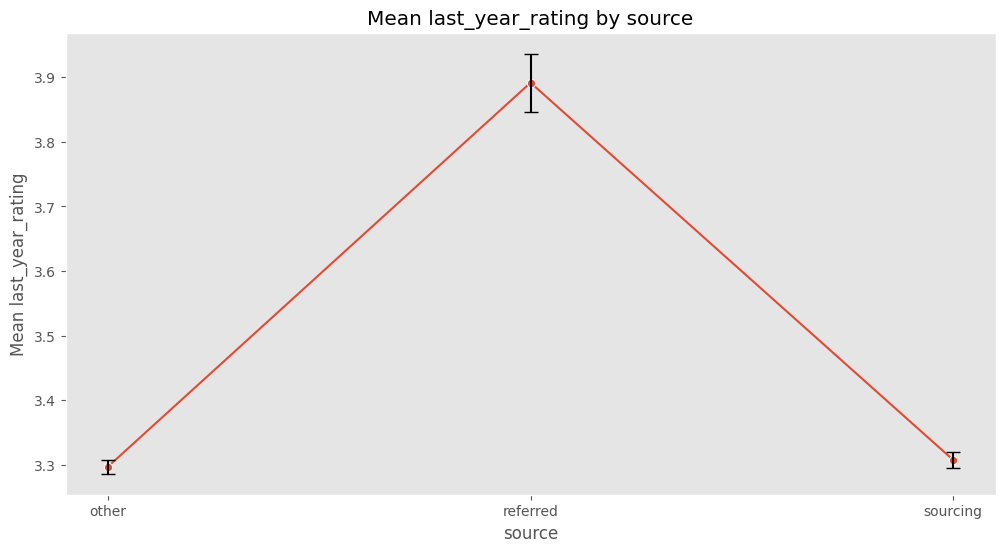

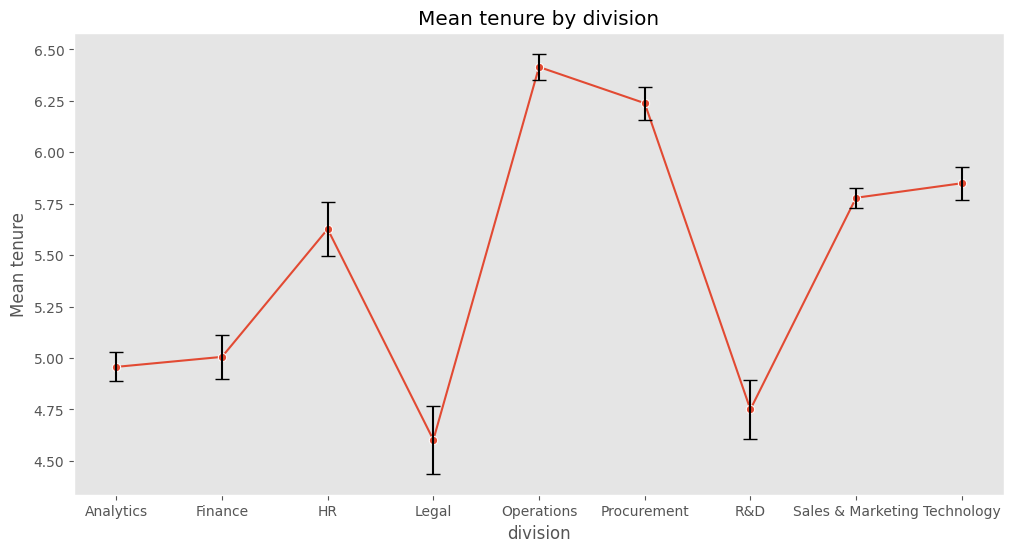

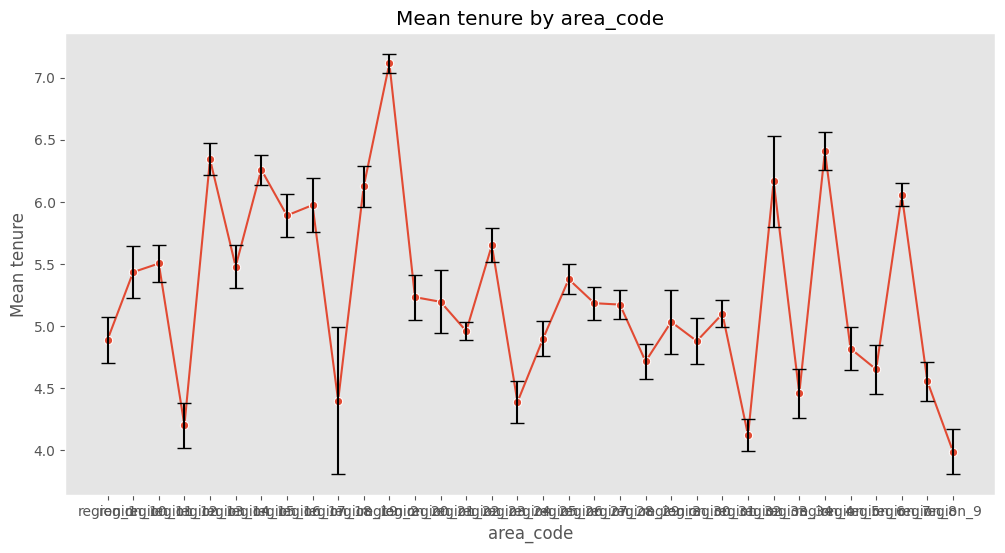

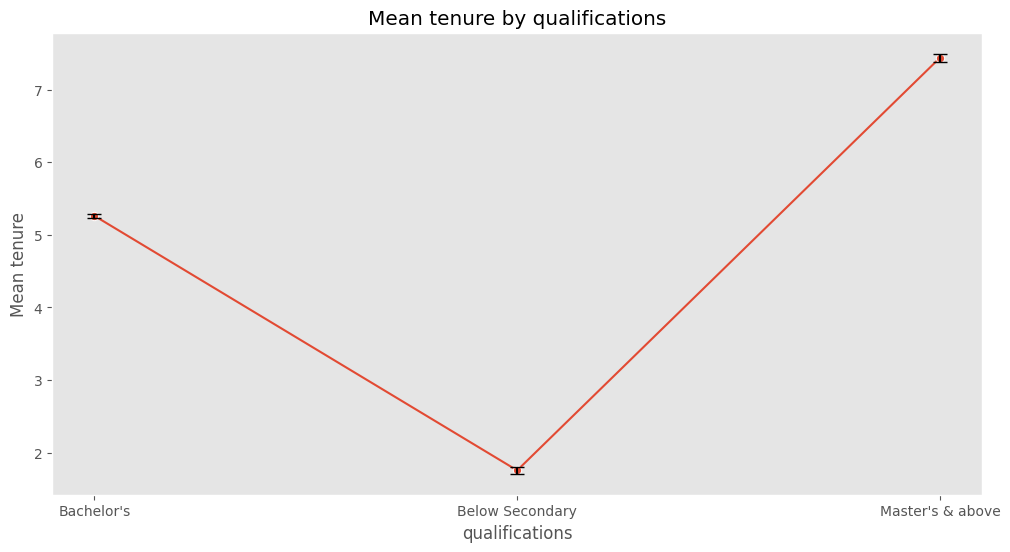

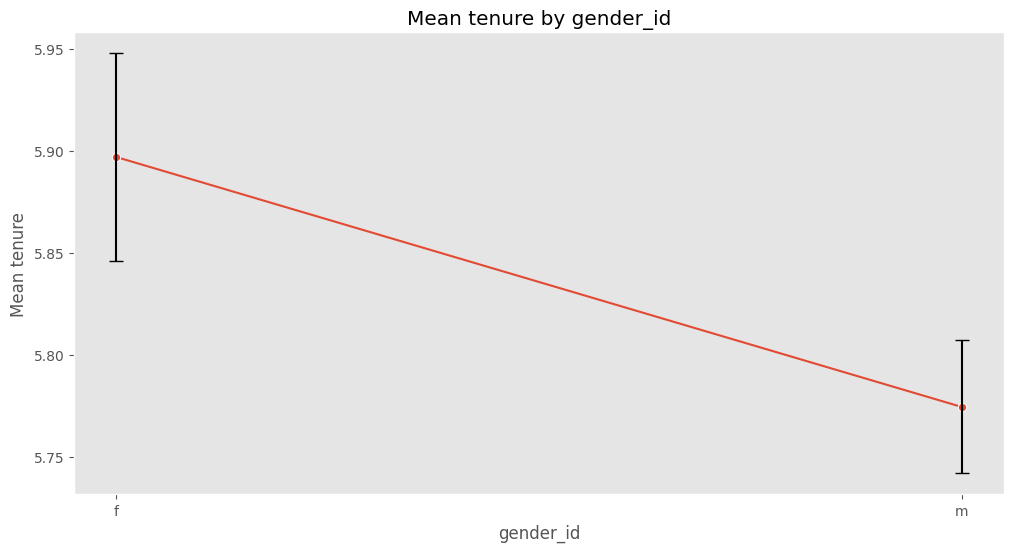

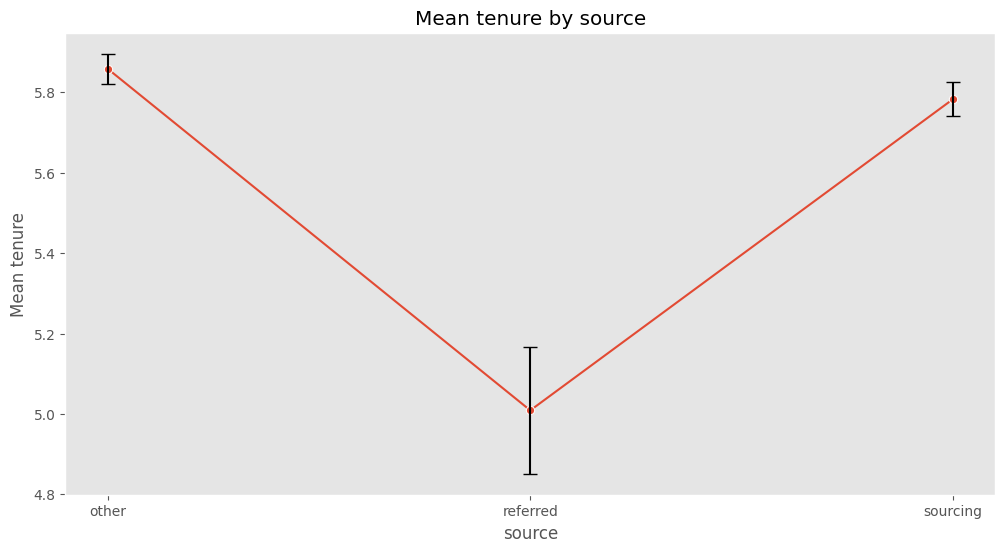

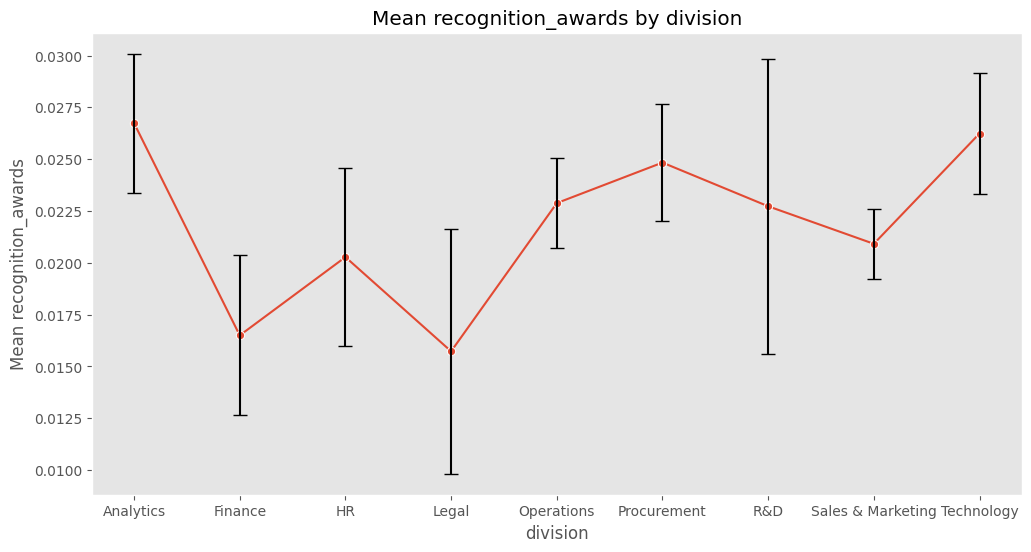

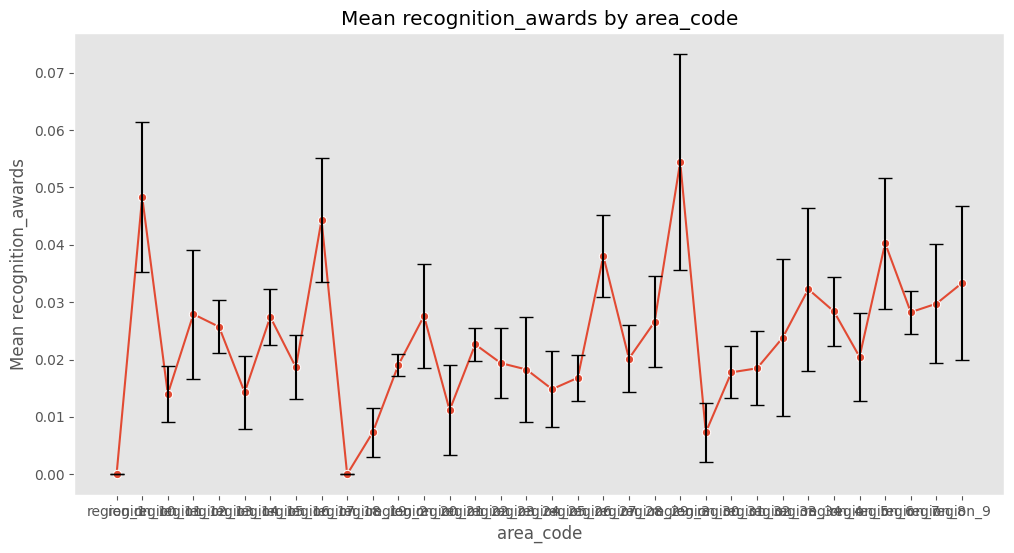

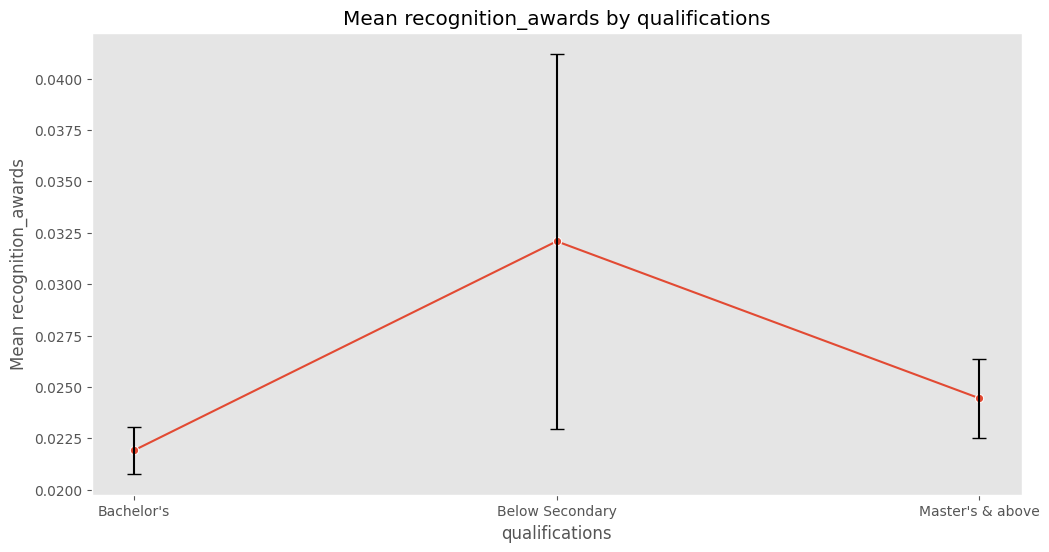

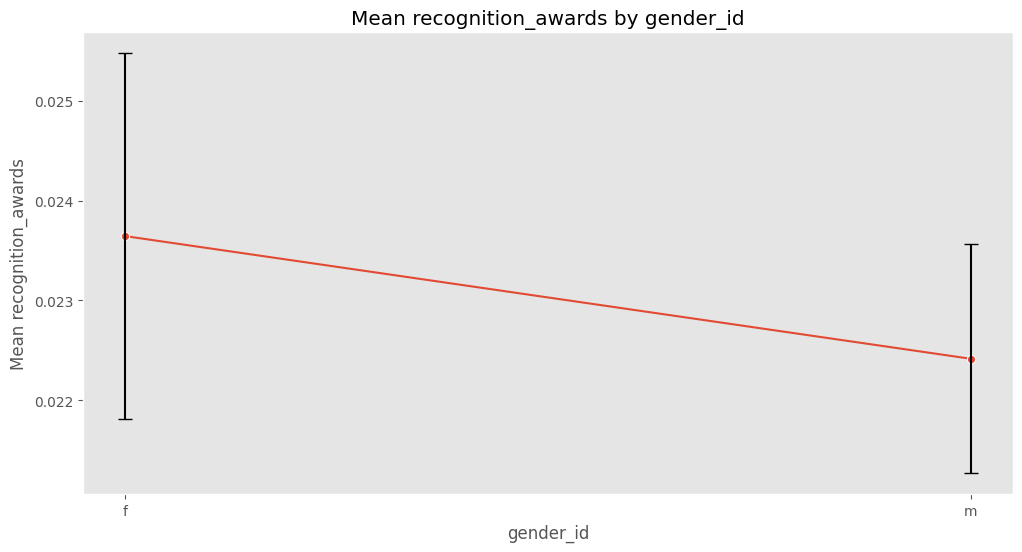

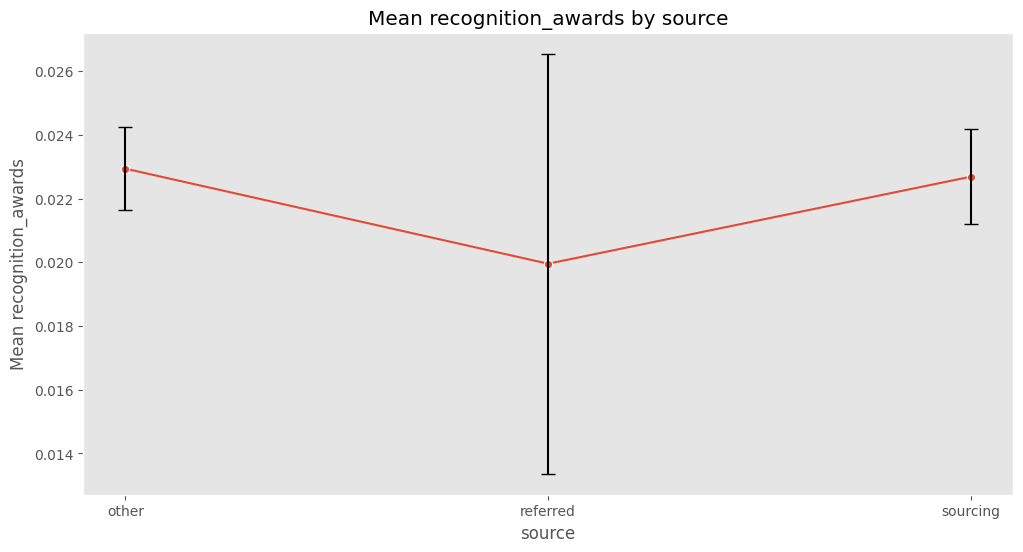

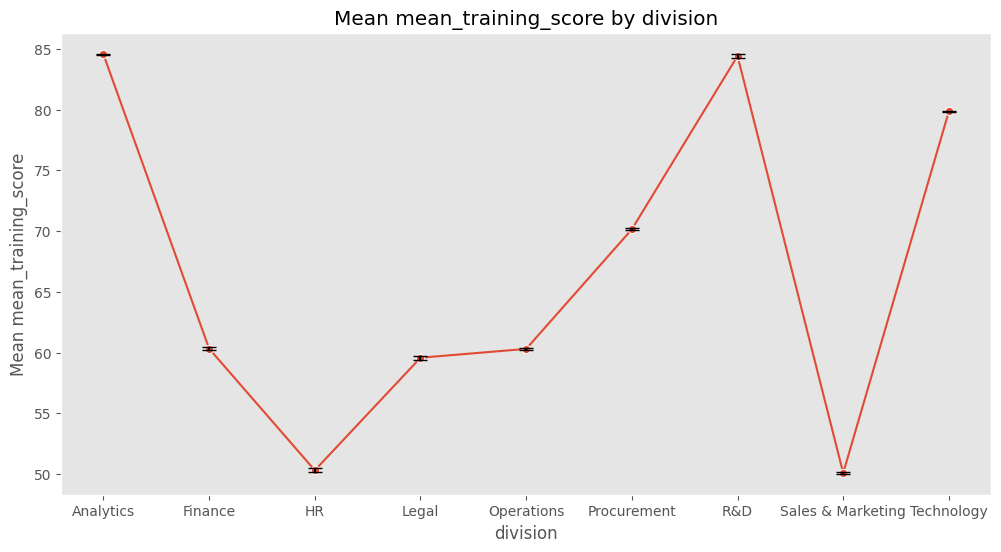

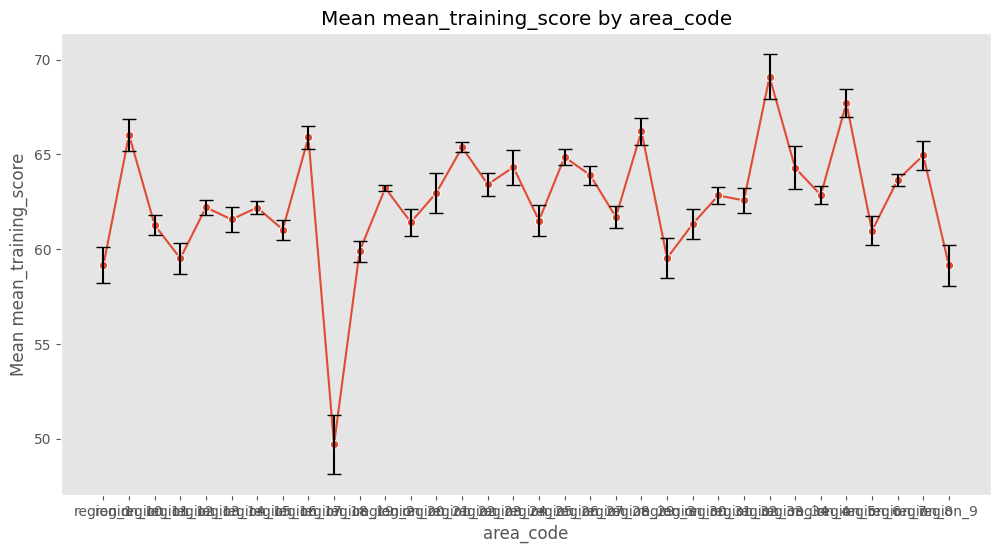

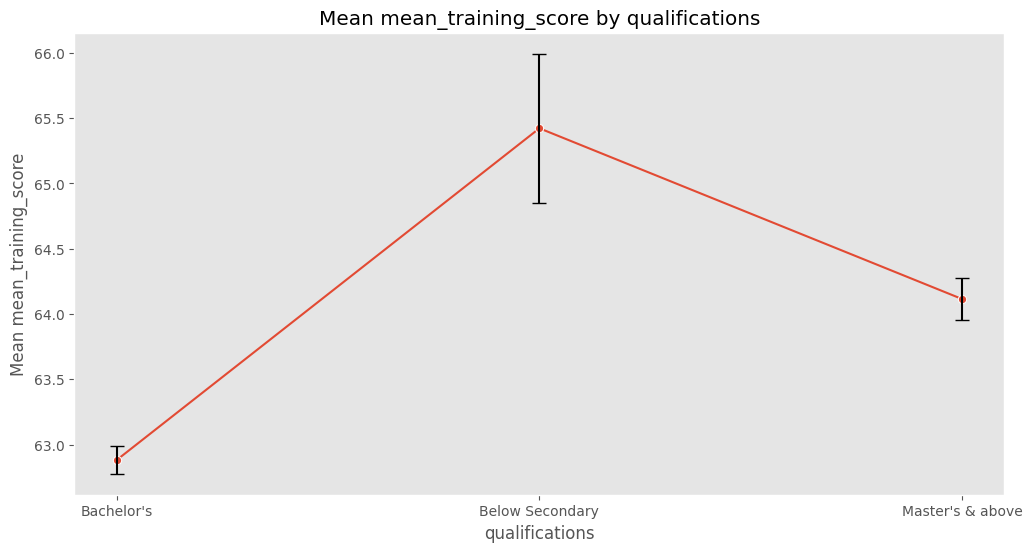

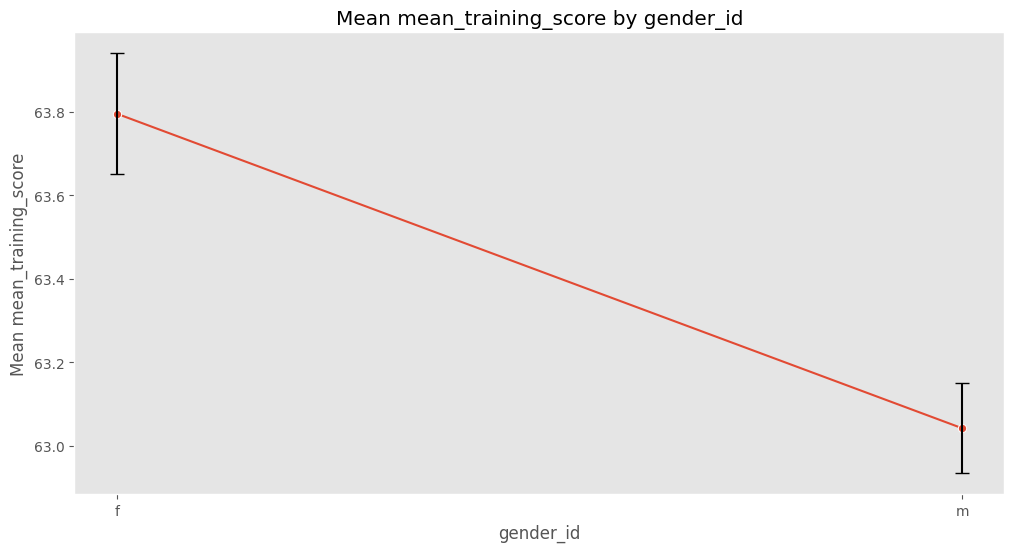

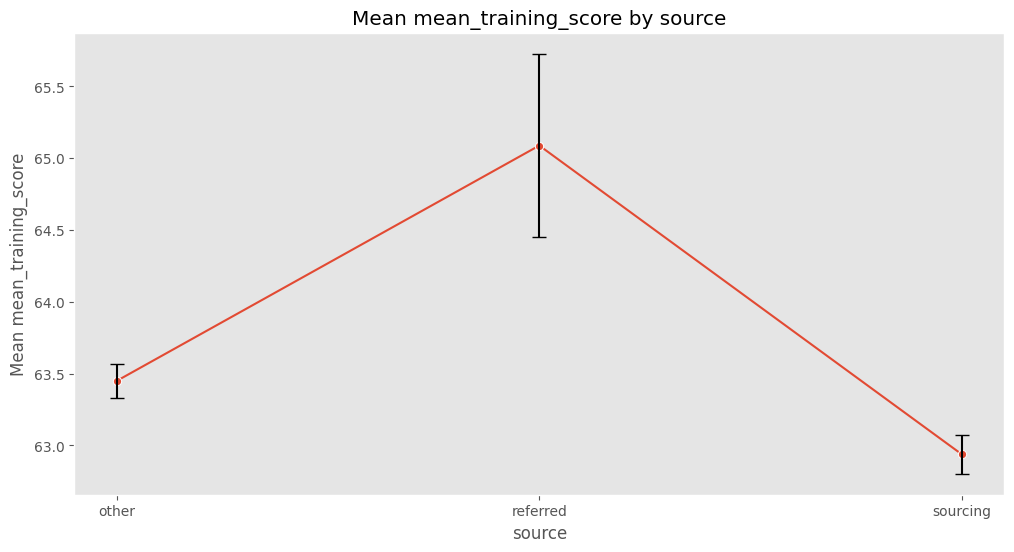

In [119]:
for num_col, cat_col in product(num_cols, cat_cols):
    # Calculate mean and standard deviation for the numerical column based on categorical variable
    summary = data.groupby(cat_col).agg(
        mean_value=(num_col, 'mean'),
        std_value=(num_col, 'std'),
        count=(num_col, 'size')
    ).reset_index()

    # Calculate standard error for error bars
    summary['std_error'] = summary['std_value'] / summary['count']**0.5

    # Plotting line chart with error bars
    plt.style.use("ggplot")  # Applying a different matplotlib style
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=summary, x=cat_col, y='mean_value', marker='o')

    # Add error bars
    plt.style.use("ggplot")  # Applying a different matplotlib style
    plt.errorbar(x=summary[cat_col], 
                 y=summary['mean_value'], 
                 yerr=summary['std_error'], 
                 fmt='none', 
                 c='black', 
                 capsize=5)

    # Adding titles and labels
    plt.style.use("ggplot")  # Applying a different matplotlib style
    plt.title(f'Mean {num_col} by {cat_col}')
    plt.style.use("ggplot")  # Applying a different matplotlib style
    plt.xlabel(cat_col)
    plt.style.use("ggplot")  # Applying a different matplotlib style
    plt.ylabel(f'Mean {num_col}')
    plt.style.use("ggplot")  # Applying a different matplotlib style
    plt.grid()

    # Show the plot
    plt.style.use("ggplot")  # Applying a different matplotlib style
    plt.show()

## Visualize Relationships Across All Feature Combinations

In this section, we will generate visualizations that illustrate the relationships between every numerical and categorical variable in our dataset. By systematically examining these combinations, we can uncover patterns and insights that may inform our analysis and decision-making.


In [120]:
import pandas as pd
from itertools import product
from scipy import stats

# Constants
SAMPLE_SIZE_THRESHOLD = 30
SIGNIFICANCE_LEVEL = 0.05

results = []

# Assuming you have two lists: cat_cols (categorical) and num_cols (numerical)
for cat_col, num_col in product(cat_cols, num_cols):
    # Drop any rows with missing values for the current pair of columns
    filtered_data = data[[cat_col, num_col]].dropna()
    
    # Group numerical data by the categorical column
    groups = filtered_data.groupby(cat_col)[num_col]

    # Get unique categories
    unique_categories = filtered_data[cat_col].unique()

    # Skip if there's only one category
    if len(unique_categories) < 2:
        results.append(f"Skipping {cat_col} - {num_col}: Less than two categories")
        continue

    if len(unique_categories) == 2:  # Binary categories
        group1 = groups.get_group(unique_categories[0])
        group2 = groups.get_group(unique_categories[1])

        # Perform T-test or Z-test approximation
        if len(group1) > SAMPLE_SIZE_THRESHOLD and len(group2) > SAMPLE_SIZE_THRESHOLD:
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_type = "Z-test (T-test approximation)"
        else:
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_type = "T-test"
        
        result = f"{test_type} between {cat_col} and {num_col}: Statistic: {stat:.4f}, p-value: {p_value:.4f}."
        if p_value < SIGNIFICANCE_LEVEL:
            result += " Reject the null hypothesis."
        else:
            result += " Fail to reject the null hypothesis."
        results.append(result)

    else:  # More than 2 categories (ANOVA)
        category_data = [group for _, group in groups]
        stat, p_value = stats.f_oneway(*category_data)
        result = f"ANOVA between {cat_col} and {num_col}: Statistic: {stat:.4f}, p-value: {p_value:.4f}."
        if p_value < SIGNIFICANCE_LEVEL:
            result += " Reject the null hypothesis."
        else:
            result += " Fail to reject the null hypothesis."
        results.append(result)

# Print all results at once
for res in results:
    print(res)


ANOVA between division and staff_id: Statistic: 1.5219, p-value: 0.1436. Fail to reject the null hypothesis.
ANOVA between division and training_sessions: Statistic: 47.6958, p-value: 0.0000. Reject the null hypothesis.
ANOVA between division and years_old: Statistic: 78.2149, p-value: 0.0000. Reject the null hypothesis.
ANOVA between division and last_year_rating: Statistic: 97.4145, p-value: 0.0000. Reject the null hypothesis.
ANOVA between division and tenure: Statistic: 42.1143, p-value: 0.0000. Reject the null hypothesis.
ANOVA between division and recognition_awards: Statistic: 1.0246, p-value: 0.4145. Fail to reject the null hypothesis.
ANOVA between division and mean_training_score: Statistic: 22057.6732, p-value: 0.0000. Reject the null hypothesis.
ANOVA between area_code and staff_id: Statistic: 1.1560, p-value: 0.2470. Fail to reject the null hypothesis.
ANOVA between area_code and training_sessions: Statistic: 12.4224, p-value: 0.0000. Reject the null hypothesis.
ANOVA betw

## Conclusions

### Key Insights and Recommendations

1. **Employee Efficiency**: The company should focus on enhancing employee efficiency, as a significant number of employees struggle to meet the KPI threshold of 80.

2. **Qualifications vs. Performance**: Higher qualifications do not necessarily correlate with better employee performance, as indicated by both KPI achievements and award distributions. A more nuanced evaluation of qualifications and their impact on performance may be needed.

3. **Gender Ratio Improvement**: The company should consider initiatives to improve the female-to-male ratio within the workforce, promoting diversity and inclusion.

4. **Sales and Marketing Concerns**: The Sales and Marketing division shows the lowest average KPI performance. Strategic improvements in this area are essential to boost overall revenue.

5. **Feature Engineering for Model Training**: Given the high dependency observed between several columns, thorough feature engineering is critical before training predictive models to ensure optimal performance.


# Cleaning

<Axes: xlabel='tenure'>

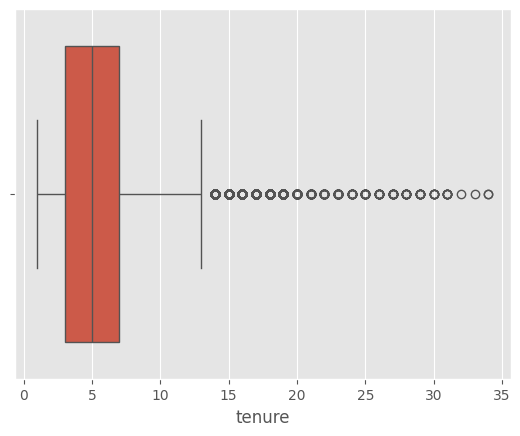

In [121]:
# check for outliers
sns.boxplot(data=data,x="tenure")

In [122]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['tenure'].quantile(0.25)
Q3 = data['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
data_filtered = data[(data['tenure'] >= lower_bound) & (data['tenure'] <= upper_bound)]

# Optionally, print the number of rows before and after filtering
print(f'Original data size: {data.shape[0]}')  # Total number of rows in the original dataset
print(f'Filtered data size: {data_filtered.shape[0]}')  # Total number of rows after removing outliers


Original data size: 23490
Filtered data size: 22005


# Encoding Categorical Data

In [123]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_division = LabelEncoder()
le_area_code = LabelEncoder()

# Apply Label Encoding to the 'division' column
data['division_encoded'] = le_division.fit_transform(data['division'])

# Apply Label Encoding to the 'area_code' column
data['area_code_encoded'] = le_area_code.fit_transform(data['area_code'])

# Drop the original categorical columns
data = data.drop(columns=['division', 'area_code'])

# Display the resulting DataFrame
print(data)


       staff_id    qualifications gender_id    source  training_sessions  \
0          8724        Bachelor's         m  sourcing                  1   
1         74430        Bachelor's         f     other                  1   
2         72255        Bachelor's         m     other                  1   
3         38562        Bachelor's         f     other                  3   
4         64486        Bachelor's         m  sourcing                  1   
...         ...               ...       ...       ...                ...   
23485     53478   Below Secondary         m  sourcing                  1   
23486     25600        Bachelor's         m  sourcing                  1   
23487     45409        Bachelor's         f  sourcing                  1   
23488      1186        Bachelor's         m  sourcing                  3   
23489      5973  Master's & above         m     other                  3   

       years_old  last_year_rating  tenure  recognition_awards  \
0             24     

In [124]:
# One-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender_id', 'source'], drop_first=True) 

# Drop the original categorical columns
data = data.drop(columns=['gender_id', 'source'])

# Display the resulting DataFrame
print(data_encoded)


       staff_id    qualifications  training_sessions  years_old  \
0          8724        Bachelor's                  1         24   
1         74430        Bachelor's                  1         31   
2         72255        Bachelor's                  1         31   
3         38562        Bachelor's                  3         31   
4         64486        Bachelor's                  1         30   
...         ...               ...                ...        ...   
23485     53478   Below Secondary                  1         24   
23486     25600        Bachelor's                  1         31   
23487     45409        Bachelor's                  1         26   
23488      1186        Bachelor's                  3         27   
23489      5973  Master's & above                  3         40   

       last_year_rating  tenure  recognition_awards  mean_training_score  \
0                   3.0       1                   0                   77   
1                   3.0       5            

In [125]:
data.qualifications.unique()

array(["Bachelor's", "Master's & above", 'Below Secondary'], dtype=object)

In [126]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

data_encoded['qualifications'] = data_encoded['qualifications'].replace({
    "Bachelor's": 'Bachelors',
    "Master's & above": 'Masters & above'
})

# Define the order of qualifications levels (from lowest to highest)
qualifications_levels = ['Below Secondary', 'Bachelors', 'Masters & above']

# Initialize the OrdinalEncoder with the specified categories
ordinal_encoder = OrdinalEncoder(categories=[qualifications_levels])

# Apply ordinal encoding to the qualifications column
data_encoded['qualifications_encoded'] = ordinal_encoder.fit_transform(data_encoded[['qualifications']])

# Drop the original qualifications column
data_encoded.drop(columns=["qualifications"], inplace=True)

# Display the DataFrame with the encoded column
print(data_encoded)

       staff_id  training_sessions  years_old  last_year_rating  tenure  \
0          8724                  1         24               3.0       1   
1         74430                  1         31               3.0       5   
2         72255                  1         31               1.0       4   
3         38562                  3         31               2.0       9   
4         64486                  1         30               4.0       7   
...         ...                ...        ...               ...     ...   
23485     53478                  1         24               3.0       1   
23486     25600                  1         31               3.0       7   
23487     45409                  1         26               4.0       4   
23488      1186                  3         27               3.0       1   
23489      5973                  3         40               5.0       5   

       recognition_awards  mean_training_score  division_encoded  \
0                       0      

# Now our dataset is ready to train ml models